<a href="https://colab.research.google.com/github/sungjae2004/AIIA_AFAC_1/blob/main/Food_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, models, transforms
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
drive.mount('/content/drive')
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

Mounted at /content/drive
cuda


train, test 데이터 구분


In [19]:
path = "/content/drive/MyDrive/AIIA AFAC/_Food_test"

data_transforms = transforms.Compose([
transforms.RandomResizedCrop(224),
transforms.RandomHorizontalFlip(),
transforms.ToTensor(),
transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
image_datasets = datasets.ImageFolder(path,data_transforms)

print(image_datasets)

class_names = image_datasets.classes

Dataset ImageFolder
    Number of datapoints: 2
    Root location: /content/drive/MyDrive/AIIA AFAC/_Food_test
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [20]:
batch_size = 2
validation_split = .2
shuffle_dataset = True
random_seed= 42

In [21]:
# training, test 분할을 위한 인덱스 생성
dataset_size = len(image_datasets)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
train_loader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size,sampler=valid_sampler)
inputs, classes = next(iter(train_loader))
print(classes)


tensor([0, 0])


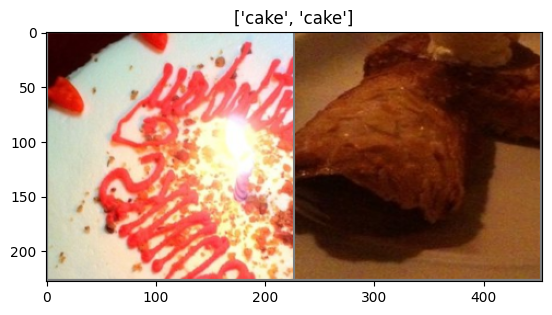

In [22]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

tensor([0, 0])


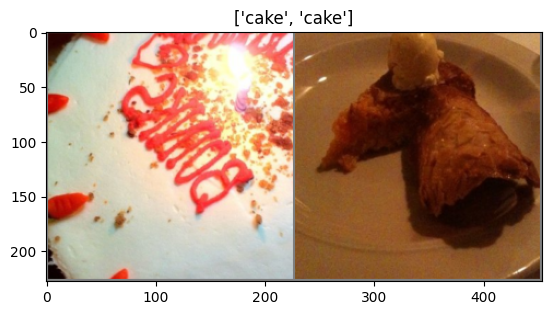

In [23]:
inputs, classes = next(iter(train_loader))
print(classes)
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [24]:
!git clone https://github.com/sungjae2004/AIIA_AFAC_1.git

Cloning into 'AIIA_AFAC_1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
